<a href="https://www.kaggle.com/lobnaabdelaziz/house-price-prediction?scriptVersionId=88798789" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing

train_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv', index_col=0)
test_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv', index_col=0)



In [2]:
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


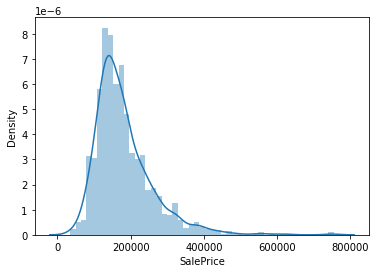

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(train_data['SalePrice']);
plt.show()

In [4]:
X = train_data[['LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                'TotalBsmtSF', '1stFlrSF','2ndFlrSF','LowQualFinSF', 'GrLivArea', 'WoodDeckSF', 
                'OpenPorchSF', 'EnclosedPorch','3SsnPorch', 'ScreenPorch', 'PoolArea',
                'MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 
                'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
                'GarageCars']]

y = train_data['SalePrice']

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


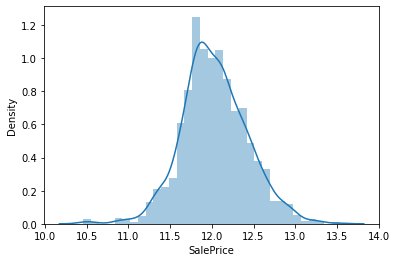

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,shuffle=True)

y_train_norm = np.log1p(y_train)
y_test_norm = np.log1p(y_test)
sns.distplot(y_train_norm)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)


In [6]:
missing = train_data.isna()
percent = (missing.sum()/missing.count()*100).sort_values(ascending=False)
missing_columns = percent[percent >=1].index.tolist()
print('Columns which have missing values: \n{0}'.format(missing_columns))

Columns which have missing values: 
['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtFinType1']


<AxesSubplot:>

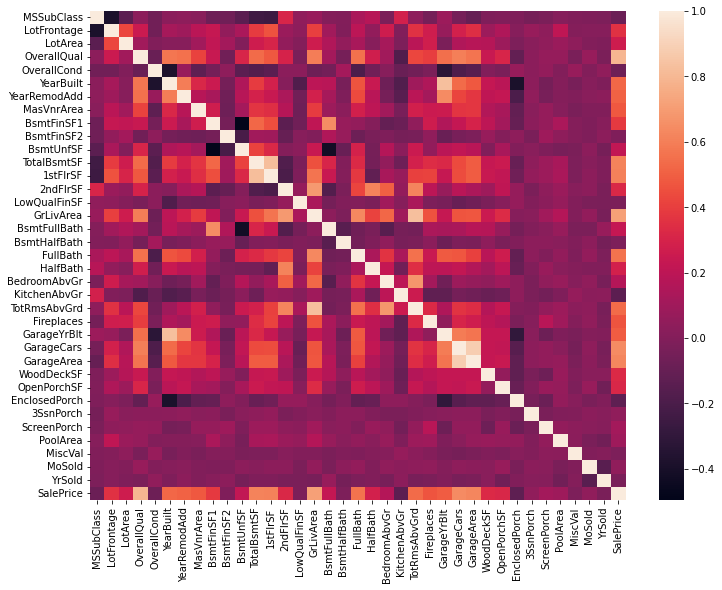

In [7]:
corr_matrix =train_data.corr()
plt.figure(figsize=[12, 9])
sns.heatmap(corr_matrix,xticklabels=corr_matrix.columns.values,yticklabels=corr_matrix.columns.values)

# Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error



regressor = LinearRegression()
regressor.fit(X_train, y_train_norm)
y_pred1 =  np.expm1(regressor.predict(X_train))
print('Training accuracy:',r2_score(y_train, y_pred1))
print('mae:',mean_absolute_error(y_train, y_pred1))
print('mse:',mean_squared_error(y_train, y_pred1))
print('rmse:',mean_squared_error(y_train, y_pred1, squared=False))

print('='*100)

y_pred2 = np.expm1(regressor.predict(X_test))
print('Validation accuracy:',r2_score(y_test, y_pred2))

print('mae:',mean_absolute_error(y_test, y_pred2))
print('mse:',mean_squared_error(y_test, y_pred2))
print('rmse:',mean_squared_error(y_test, y_pred2, squared=False))




Training accuracy: 0.7735011341883191
mae: 19998.67446381499
mse: 1379880052.114917
rmse: 37146.736762667555
Validation accuracy: 0.8804700260683115
mae: 18490.820570921718
mse: 852481005.8782998
rmse: 29197.27737098615


# SGD Regressor

R-squared: 82.44834054214186


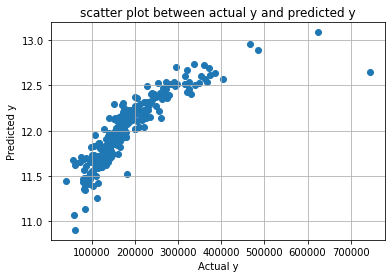

Mean Squared Error : 38023691015.9582
Mean Absolute Error : 175760.6275548021


0.8023522637172698

In [9]:
sgdr = SGDRegressor()
sgdr.fit(X_train, y_train_norm)
score = sgdr.score(X_train, y_train_norm)
print("R-squared:", score*100)
plt.scatter(y_test,sgdr.predict(X_test))
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test,sgdr.predict(X_test)))
print('Mean Absolute Error :',mean_absolute_error(y_test,sgdr.predict(X_test)))
y_pred1 = np.expm1(sgdr.predict(X_train))
r2_score(y_train,y_pred1)



# Ridge

In [10]:
from sklearn.linear_model import Ridge
import numpy as np

clf = Ridge(alpha=0.001)
clf.fit(X_train, y_train_norm)
ridge_predicted = np.expm1(clf.predict(X_train))

print(r2_score(y_train, ridge_predicted))

ridge_predicted2 =np.expm1(clf.predict(X_test))

print(r2_score(y_test, ridge_predicted2))


0.7735205898305784
0.8802364253687569


# Lasso

In [11]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.001)
clf.fit(X_train, y_train_norm)
lasso_predicted = clf.predict(X_train)
print(r2_score(y_train_norm, lasso_predicted))

lasso_predicted2 = clf.predict(X_test)
print(r2_score(y_test_norm, lasso_predicted2))

0.8398364492773939
0.8690200757096427


# Elastic Net

In [12]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet(alpha=0.005)
regr.fit(X_train, y_train_norm)
elastic_predicted = regr.predict(X_train)
print(r2_score(y_train_norm, elastic_predicted))
elastic_predicted2 = regr.predict(X_test)
print(r2_score(y_test_norm, elastic_predicted2))


0.83938351533397
0.8690022974032541


# Neural Network

In [13]:
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(units = 32, activation = "relu"))
model.add(layers.Dense(1))
model.compile(optimizer='Adam', loss='mse', metrics=['mae'])
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train,y_train,batch_size=64,epochs=400, validation_data=(X_test,y_test))
model.summary()

2022-02-26 14:38:21.955006: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-02-26 14:38:22.082058: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/400
19/19 [==============================] - 1s 12ms/step - loss: 39291580416.0000 - mae: 182207.0469 - val_loss: 38027059200.0000 - val_mae: 175770.3594
Epoch 2/400
19/19 [==============================] - 0s 4ms/step - loss: 39290679296.0000 - mae: 182204.8594 - val_loss: 38025904128.0000 - val_mae: 175767.6094
Epoch 3/400
19/19 [==============================] - 0s 4ms/step - loss: 39289135104.0000 - mae: 182201.2031 - val_loss: 38023909376.0000 - val_mae: 175763.0156
Epoch 4/400
19/19 [==============================] - 0s 4ms/step - loss: 39286460416.0000 - mae: 182195.1562 - val_loss: 38020571136.0000 - val_mae: 175755.5781
Epoch 5/400
19/19 [==============================] - 0s 5ms/step - loss: 39282262016.0000 - mae: 182185.6875 - val_loss: 38015262720.0000 - val_mae: 175744.0938
Epoch 6/400
19/19 [==============================] - 0s 3ms/step - loss: 39275634688.0000 - mae: 182171.3281 - val_loss: 38007369728.0000 - val_mae: 175727.3281
Epoch 7/400
19/19 [==============

In [14]:
y_pred1 =model.predict(X_train)
print(r2_score(y_train, y_pred1))

0.7636147760822909


In [15]:
y_pred2 =model.predict(X_test)
print(r2_score(y_test, y_pred2))

0.7521167788509908


# SVR Linear Kernel

In [16]:
from sklearn.svm import SVR

model = SVR(kernel = 'linear' , C =1)
model.fit(X_train, y_train_norm)
print(model.score(X_train,y_train_norm))
y_pred1 = np.expm1(model.predict(X_train))
print("accuracy for train data:",r2_score(y_train, y_pred1))
print('mae:',mean_absolute_error(y_train, y_pred1))
print('mse:',mean_squared_error(y_train, y_pred1))
print('rmse:',mean_squared_error(y_train, y_pred1, squared=False))

y_pred2 = np.expm1(model.predict(X_test))
print("accuracy for validation data data:",r2_score(y_test, y_pred2)*100)
print('mae:',mean_absolute_error(y_test, y_pred2))
print('mse:',mean_squared_error(y_test, y_pred2))
print('rmse:',mean_squared_error(y_test, y_pred2, squared=False))

0.8205153564859735
accuracy for train data: 0.14285892067413963
mae: 20366.379198373208
mse: 5221888740.90604
rmse: 72262.63724018131
accuracy for validation data data: 91.97131519646382
mae: 17038.790543429044
mse: 572601254.0678595
rmse: 23929.088032515145


# SVR rbf kernel

In [17]:
from sklearn.svm import SVR

model = SVR(kernel = 'rbf' , C =1)
model.fit(X_train, y_train_norm)
y_pred1 = np.expm1(model.predict(X_train))
print("accuracy for train data:",r2_score(y_train, y_pred1)*100)
print('mae:',mean_absolute_error(y_train, y_pred1))
print('mse:',mean_squared_error(y_train, y_pred1))
print('rmse:',mean_squared_error(y_train, y_pred1, squared=False))

print('='*100)

y_pred2 = np.expm1(model.predict(X_test))
print("accuracy for test data:",r2_score(y_test, y_pred2)*100)
print('mae:',mean_absolute_error(y_test, y_pred2))
print('mse:',mean_squared_error(y_test, y_pred2))
print('rmse:',mean_squared_error(y_test, y_pred2, squared=False))

accuracy for train data: 94.86923933857652
mae: 13116.30569853271
mse: 312577030.50754476
rmse: 17679.848147185676
accuracy for test data: 76.02483520918653
mae: 18904.509035271345
mse: 1709895177.3093505
rmse: 41350.8787973043


# SVR poly kernel

In [18]:
from sklearn.svm import SVR

model = SVR(kernel = 'poly')
model.fit(X_train, y_train_norm)
#y_pred = model.predict(X_test)
y_pred1 = np.expm1(model.predict(X_train))
print("accuracy for train data:",r2_score(y_train, y_pred1))
print('mae:',mean_absolute_error(y_train, y_pred1))
print('mse:',mean_squared_error(y_train, y_pred1))
print('rmse:',mean_squared_error(y_train, y_pred1, squared=False))

print('='*100)

y_pred2 = np.expm1(model.predict(X_test))
print("accuracy for test data:",r2_score(y_test, y_pred2))
print('mae:',mean_absolute_error(y_test, y_pred2))
print('mse:',mean_squared_error(y_test, y_pred2))
print('rmse:',mean_squared_error(y_test, y_pred2, squared=False))

accuracy for train data: 0.9310332982503877
mae: 15203.519142434161
mse: 420160055.38664883
rmse: 20497.806111548838
accuracy for test data: -341.5262930024206
mae: 132495.22597821025
mse: 2442878126664.24
rmse: 1562970.9295646674


In [19]:
"""
Xt = test_data[['MSSubClass','LotArea','OverallQual','OverallCond',
                'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath',
                'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
                'Fireplaces','GarageCars',
                'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']]
from sklearn.impute import SimpleImputer



X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.2, random_state=1)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_test = imp_mean.fit_transform(X_test)

model = SVR(kernel = 'linear')
model.fit(X_train, y_train)
print(model.score(X_train,y_train))
y_pred1 = model.predict(X_train)
print("accuracy for train data:",r2_score(y_train, y_pred1))
print('mae:',mean_absolute_error(y_train, y_pred1))
print('mse:',mean_squared_error(y_train, y_pred1))
print('rmse:',mean_squared_error(y_train, y_pred1, squared=False))

y_pred2 = model.predict(X_test)
print("accuracy for validation data data:",r2_score(y_test, y_pred2)*100)
print('mae:',mean_absolute_error(y_test, y_pred2))
print('mse:',mean_squared_error(y_test, y_pred2))
print('rmse:',mean_squared_error(y_test, y_pred2, squared=False))
"""

'\nXt = test_data[[\'MSSubClass\',\'LotArea\',\'OverallQual\',\'OverallCond\',\n                \'BsmtFinSF1\',\'BsmtFinSF2\',\'BsmtUnfSF\',\n                \'TotalBsmtSF\',\'1stFlrSF\',\'2ndFlrSF\',\'LowQualFinSF\',\'GrLivArea\',\'BsmtFullBath\',\n                \'BsmtHalfBath\',\'FullBath\',\'HalfBath\',\'BedroomAbvGr\',\'KitchenAbvGr\',\'TotRmsAbvGrd\',\n                \'Fireplaces\',\'GarageCars\',\n                \'WoodDeckSF\',\'OpenPorchSF\',\'EnclosedPorch\',\'3SsnPorch\',\'ScreenPorch\',\'PoolArea\']]\nfrom sklearn.impute import SimpleImputer\n\n\n\nX_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.2, random_state=1)\nimp_mean = SimpleImputer(missing_values=np.nan, strategy=\'mean\')\nX_test = imp_mean.fit_transform(X_test)\n\nmodel = SVR(kernel = \'linear\')\nmodel.fit(X_train, y_train)\nprint(model.score(X_train,y_train))\ny_pred1 = model.predict(X_train)\nprint("accuracy for train data:",r2_score(y_train, y_pred1))\nprint(\'mae:\',mean_absolute_erro